In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('ecom-data.xlsx')

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Preprocessing

# 1. Missing Values

In [4]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [23]:
features_with_na=[features for features in df.columns if df[features].isna().sum()>0]
features_with_na

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']

In [25]:
df[features_with_na].nunique()

Tenure                         36
WarehouseToHome                34
HourSpendOnApp                  6
OrderAmountHikeFromlastYear    16
CouponUsed                     17
OrderCount                     16
DaySinceLastOrder              22
dtype: int64

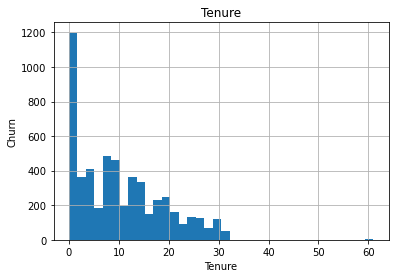

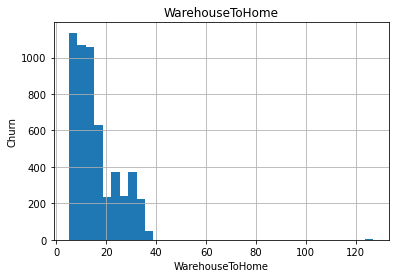

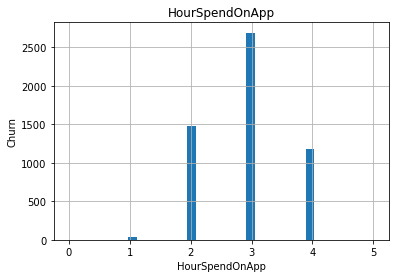

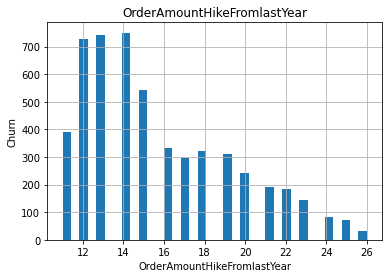

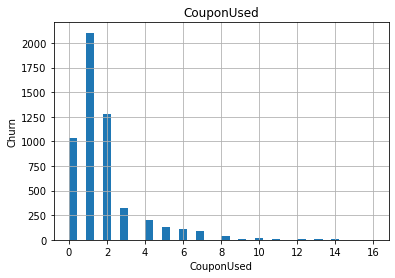

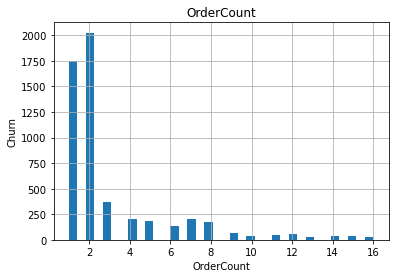

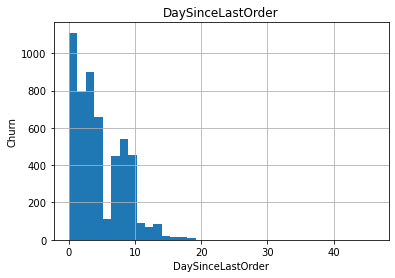

In [30]:
for features in features_with_na:
    data =df.copy()
    data[features].hist(bins=36)
    plt.xlabel(features)
    plt.ylabel('Churn')
    plt.title(features)
    plt.show()

In [31]:
#Columns with missing values are not normally distributed. Therefore, we replace the missing values with median.

In [41]:
for features in features_with_na:
    df[features]=df[features].fillna(df[features].median())
    
df[features].isna().sum()

0

# 2.Handling Outliers

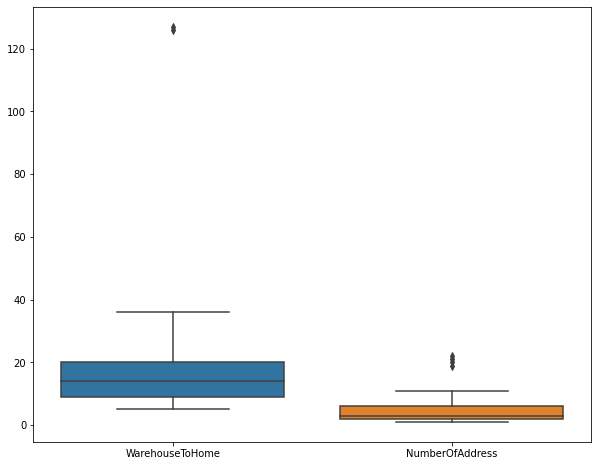

In [10]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[['WarehouseToHome','NumberOfAddress']])
#plt.title('Boxplots of Add1 to Add5')
plt.show()

<AxesSubplot:>

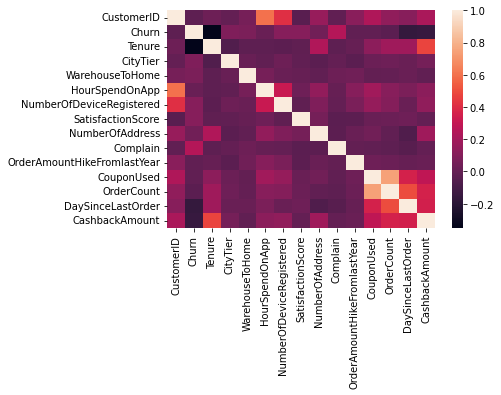

In [11]:
corrmatrix=df.corr()
sns.heatmap(corrmatrix)